# Easy example

In this example, we have 6 variables: a, b, c, d, e and f. The variables have the following domains:
- $a \in \{1, 2, 3, 4, 5, 6\}$
- $b \in \{2, 3, 4, 5, 6, 7\}$
- $c \in \{1, 2, 3\}$
- $d \in \{4, 5, 6, 7\}$
- $e \in \{7, 8, 9\}$
- $f \in \{5, 6, 10\}$

We have the following constraints:
   `AllDifferent(a, b, c, d, e, f)`
  
  |  a   | b   | c   | d   | e   |  f |
  | ---  |---  |---  |---  |---  |--- |
  |   1  | 2   | 3   | 6   |  7  | 5  |
  |   3  | 2   | 3   | 6   |  7  | 5  |
  |   5  | 3   | 2   | 4   |  8  | 6  |
  |   6  | 3   | 1   | 5   |  8  | 10 |
  |   3  | 1   | 2   | 4   |  9  | 6  |

And we want to minimize the following expression: 
$2a + 3b + c + d + 3e + 5f$

In [84]:
class SimpleProblem:
    def __init__(self, variable_names, domains, table, all_different):
        self.variable_names = variable_names
        self.domains = domains
        self.table = table
        self.all_different = all_different
    
    def plot_instance(self):
        graph = nx.Graph()
        # Connecting variables to domain values
        node_labels = {}

        domain_nodes = set()
        variable_nodes = []
        for variable_name, domain in self.domains.items():
            variable_nodes.append(variable_name)
            node_labels[variable_name] = variable_name
            for value in domain:
                domain_nodes.add(value)
                node_labels[value] = value
                graph.add_edge(variable_name, value)

        constraint_nodes = []
        # Connecting variables to allDiff constraint
        if self.all_different:
            constraint_nodes.append("allDiff")
            node_labels["allDiff"] = "allDiff"
            for variable_name in self.all_different:
                graph.add_edge("allDiff", variable_name)

        # Connecting variables to tuple element
        tuple_nodes = []
        operator_nodes = []
        if self.table:
            for i, row in enumerate(self.table):
                current_tuple_id = "tuple" + str(i)
                tuple_nodes.append(current_tuple_id)
                node_labels[current_tuple_id] = "tu"
                for variable_name, domain_value in row.items():
                    combo_operator_id = "tuple_" + str(i) + "_variable_" + variable_name
                    operator_nodes.append(combo_operator_id)
                    node_labels[combo_operator_id] = "*"
                    graph.add_edge(combo_operator_id, variable_name)
                    graph.add_edge(combo_operator_id, domain_value)
                    graph.add_edge(current_tuple_id, combo_operator_id)
                graph.add_edge(current_tuple_id, "T")
            constraint_nodes.append("T")
            node_labels["T"] = "T"
        
        pos = nx.nx_agraph.graphviz_layout(graph)
        nx.draw(graph, font_size=8, labels=node_labels, with_labels=True, pos=pos)
        nx.draw_networkx_nodes(graph, node_size=900, pos=pos, nodelist=variable_nodes, node_color="tab:red")
        nx.draw_networkx_nodes(graph, node_size=900, pos=pos, nodelist=list(domain_nodes), node_color="tab:blue")
        nx.draw_networkx_nodes(graph, node_size=500, pos=pos, nodelist=tuple_nodes, node_color="tab:green")
        nx.draw_networkx_nodes(graph, node_size=300, pos=pos, nodelist=operator_nodes, node_color="tab:green")
        nx.draw_networkx_nodes(graph, node_size=900, pos=pos, nodelist=constraint_nodes, node_color="tab:pink")
        plt.show()

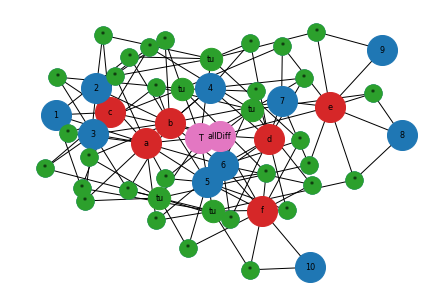

In [85]:
import networkx as nx
import matplotlib.pyplot as plt


variable_names = ["a", "b", "c", "d", "e", "f"]
domains = {
    "a": [1, 2, 3, 4, 5, 6],
    "b": [2, 3, 4, 5, 6, 7],
    "c": [1, 2, 3],
    "d": [4, 5, 6, 7],
    "e": [7, 8, 9],
    "f": [5, 6, 10]
}

table = [
    {"a": 1,"b": 2,"c": 3,"d": 6, "e":7, "f": 5},
    {"a": 3,"b": 2,"c": 3,"d": 6, "e":7, "f": 5},
    {"a": 5,"b": 3,"c": 2,"d": 4, "e":8, "f": 6},
    {"a": 6,"b": 3,"c": 1,"d": 5, "e":8, "f": 10},
    {"a": 3,"b": 1,"c": 2,"d": 4, "e":9, "f": 6}
]
all_different = ["a", "b", "c", "d", "e", "f"]

problem1 = SimpleProblem(variable_names, domains, table, all_different)
problem1.plot_instance()

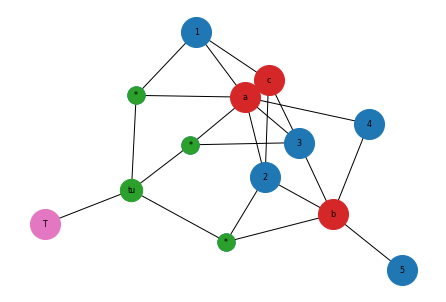

In [86]:
variable_names = ["a", "b", "c", "d", "e", "f"]
domains = {
    "a": [1, 2, 3, 4],
    "b": [2, 3, 4, 5],
    "c": [1, 2, 3]
}

table = [
    {"a": 1,"b": 2,"c": 3},
]
all_different = []

problem2 = SimpleProblem(variable_names, domains, table, all_different)
problem2.plot_instance()